In [39]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
data=pd.read_csv('titanic.csv')
data

# data=sns.load_dataset('titanic')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [41]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [42]:
null_col=[]

for col in data:
    if data[col].isnull().any()==True:
        null_col.append(col)
        print(f"{col} : {data[col].isnull().sum()}")

Age : 177
Cabin : 687
Embarked : 2


In [43]:
data['Age']=data['Age'].fillna(data['Age'].median())
data['Cabin']=data['Cabin'].fillna(data['Cabin'].mode()[0])
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

In [44]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [45]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [46]:
data['Name']=data['Name'].astype('string')
data['Sex']=data['Sex'].astype('string')
data['Embarked']=data['Embarked'].astype('string')

In [ ]:
data.dtypes 

PassengerId             int64
Survived                int64
Pclass                  int64
Name           string[python]
Sex            string[python]
Age                   float64
SibSp                   int64
Parch                   int64
Ticket                 object
Fare                  float64
Cabin                  object
Embarked       string[python]
dtype: object

In [48]:
data['Age_group']=pd.cut(data['Age'],bins=[0,10,20,30,40,50,60,70,80], 
                         labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80'],
                         right=False)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,20-30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30-40
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,20-30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30-40
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S,30-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S,20-30
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,10-20
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,B96 B98,S,20-30
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,20-30


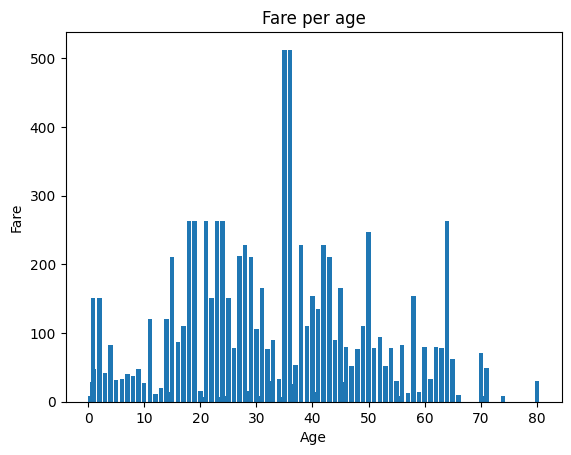

In [49]:
plt.bar(data['Age'],data['Fare'])
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Fare per age")
plt.show()

Text(0.5, 1.0, 'Age vs Survived')

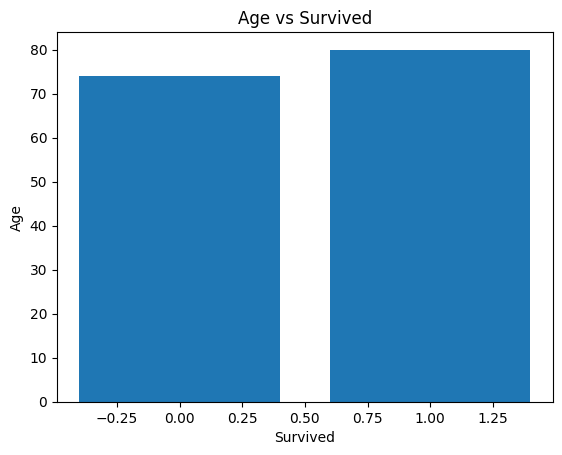

In [50]:
plt.bar(data["Survived"],data["Age"])
plt.xlabel("Survived")
plt.ylabel("Age")
plt.title("Age vs Survived")

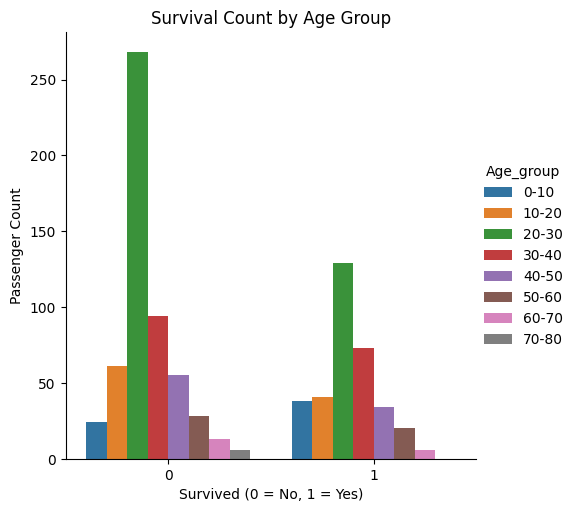

In [51]:
# Count plot

sns.catplot(data=data,x='Survived',hue='Age_group',kind='count' ,height=5)
plt.title('Survival Count by Age Group')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Passenger Count')
plt.show()


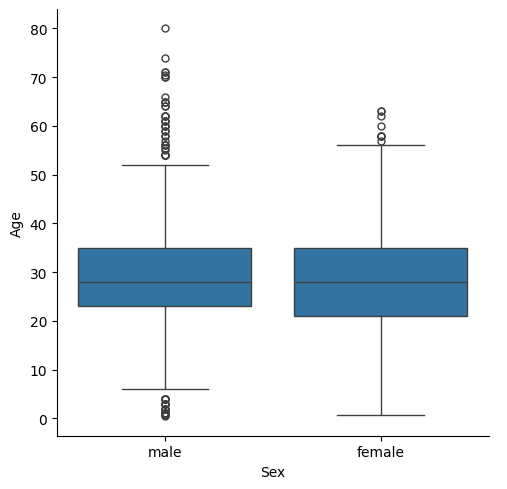

In [52]:
sns.catplot(x="Sex",y="Age",data=data,kind="box")
plt.show()

<Axes: xlabel='Pclass', ylabel='Age'>

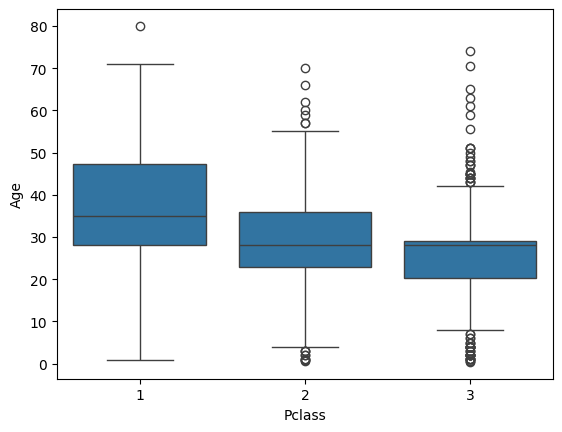

In [53]:
sns.boxplot(x="Pclass",y="Age",data=data)

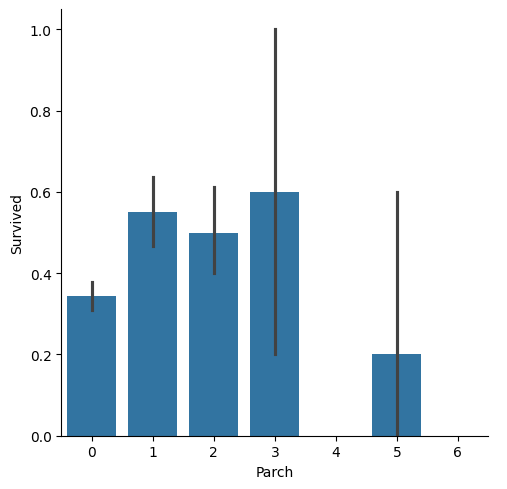

In [54]:
sns.catplot(data=data,x="Parch",y="Survived",kind="bar")
plt.show()

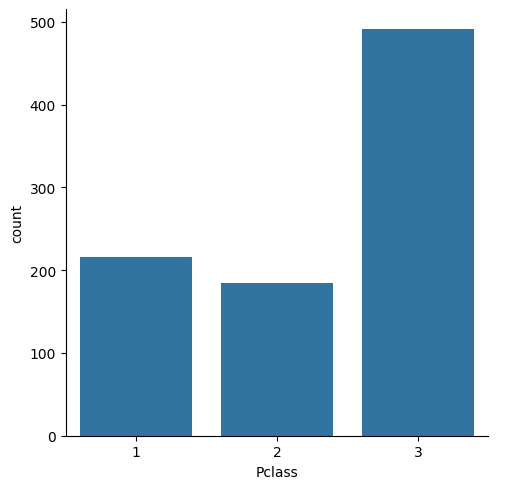

In [55]:
sns.catplot(data=data,x='Pclass',kind='count')
plt.show()

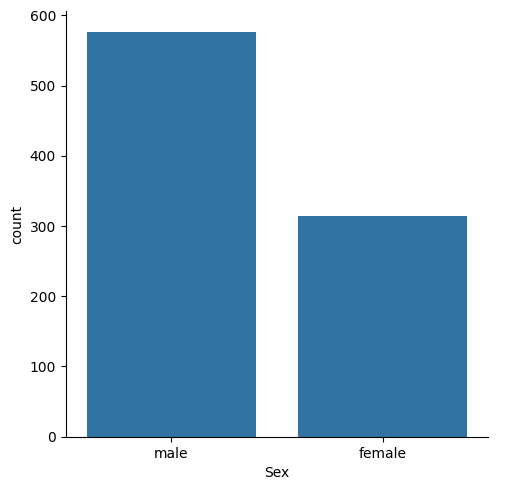

In [56]:
sns.catplot(data=data,x='Sex',kind='count')
plt.show()

<Axes: xlabel='Sex', ylabel='Age'>

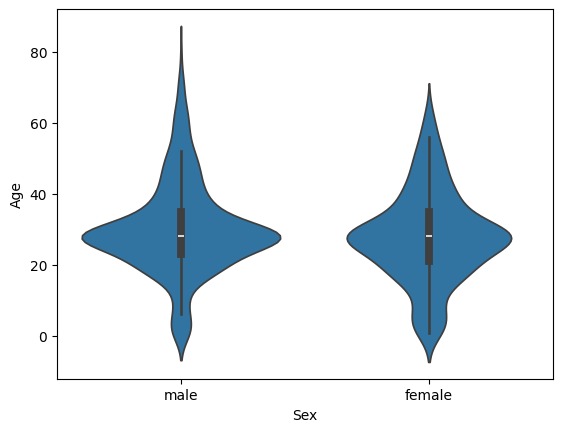

In [57]:
sns.violinplot(x='Sex',y='Age',data=data)

<Axes: xlabel='Pclass', ylabel='Age'>

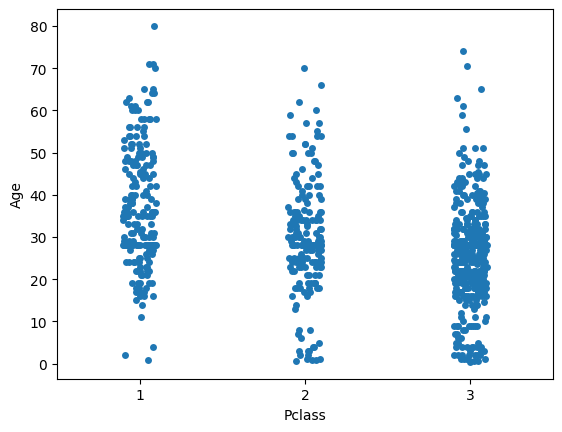

In [58]:
sns.stripplot(data=data,x='Pclass',y='Age')

C:\Users\Asus\AppData\Local\Temp\ipykernel_13324\516834005.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=high_fare_passenger, x='Survived',palette={'0':'red','1':'green'})


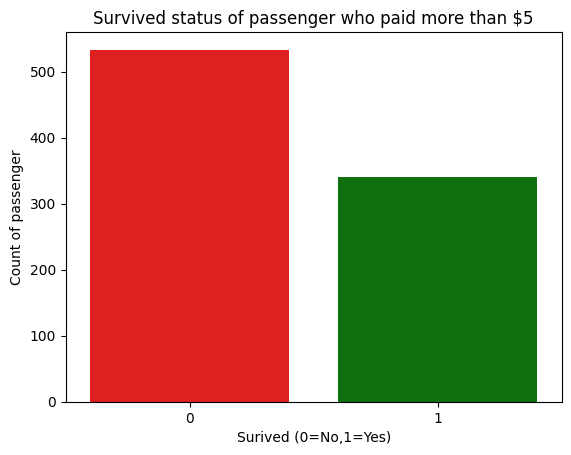

Survived rate of passenger who paid more than $5: Survived
0    533
1    341
Name: count, dtype: int64


In [59]:
high_fare_passenger=data[data['Fare']>5]

sns.countplot(data=high_fare_passenger, x='Survived',palette={'0':'red','1':'green'})
plt.title("Survived status of passenger who paid more than $5")
plt.xlabel('Surived (0=No,1=Yes)')
plt.ylabel('Count of passenger')
plt.show()

survival_rate=high_fare_passenger['Survived'].value_counts()
print(f"Survived rate of passenger who paid more than $5: {survival_rate}")

C:\Users\Asus\AppData\Local\Temp\ipykernel_13324\1058739222.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_survived_paid,x='Sex',palette={'female':'red','male':'green'})


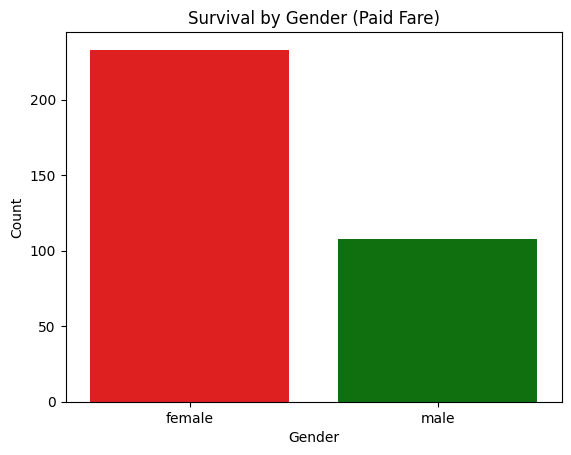

In [60]:
data_survived_paid=data[(data['Fare']>0) & (data['Survived']==1)]

sns.countplot(data=data_survived_paid,x='Sex',palette={'female':'red','male':'green'})
plt.title('Survival by Gender (Paid Fare)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_13324\2668746710.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_survived,x='Embarked',palette='Set2')


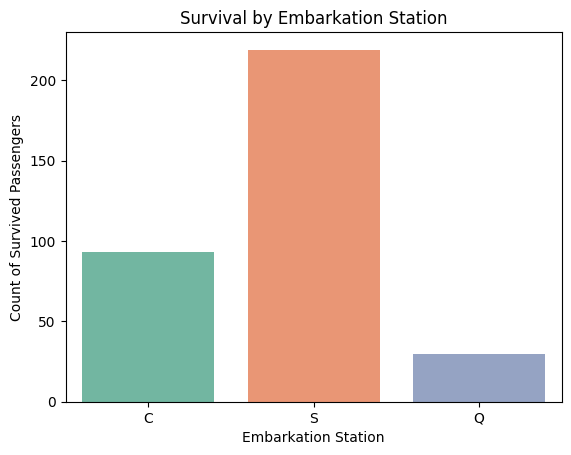

Survival Count by Embarkation Station:
Embarked
S    219
C     93
Q     30
Name: count, dtype: Int64


In [61]:
data_survived=data[(data['Survived']==1)]

sns.countplot(data=data_survived,x='Embarked',palette='Set2')
plt.title('Survival by Embarkation Station')
plt.xlabel('Embarkation Station')
plt.ylabel('Count of Survived Passengers')
plt.show()

survival_by_embarked = data_survived['Embarked'].value_counts()
print("Survival Count by Embarkation Station:")
print(survival_by_embarked)